# Exploratory Data Analysis

## Import the PhiUSIIL dataset

In [1]:
# install the ucimlrepo package
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import pickle
import os

def load_dataset(id, path):
    if os.path.isfile(path):
        with open(path, "rb") as f:
            data = pickle.load(f)
    else:
        data = fetch_ucirepo(id=id)
        with open(path, "wb") as f:
            pickle.dump(data, f)
    return data

# fetch dataset
dataset_id = 967
fname = f"downloads/id_{dataset_id}.pkl"
phiusiil_dataset = load_dataset(dataset_id, fname)
  
# data (as pandas dataframes)
X = phiusiil_dataset.data.features
y = phiusiil_dataset.data.targets
# merge X and y into a single dataframe
dataset = pd.merge(X, y, left_index=True, right_index=True)

In [3]:
from pprint import pprint

# print metadata
pprint(phiusiil_dataset.metadata)

{'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset '
             'comprising 134,850 legitimate and 100,945 phishing URLs. Most of '
             'the URLs we analyzed, while constructing the dataset, are the '
             'latest URLs. Features are extracted from the source code of the '
             'webpage and URL. Features such as CharContinuationRate, '
             'URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are '
             'derived from existing features.',
 'additional_info': {'citation': 'Prasad, A., & Chandra, S. (2023). PhiUSIIL: '
                                 'A diverse security profile empowered '
                                 'phishing URL detection framework based on '
                                 'similarity index and incremental learning. '
                                 'Computers & Security, 103545. doi: '
                                 'https://doi.org/10.1016/j.cose.2023.103545',
                     'funded_by': N

In [4]:
# variable information
phiusiil_dataset.variables

,name,role,type,demographic,description,units,missing_values
0,FILENAME,Other,Categorical,None,None,None,no
1,URL,Feature,Categorical,None,None,None,no
2,URLLength,Feature,Integer,None,None,None,no
3,Domain,Feature,Categorical,None,None,None,no
4,DomainLength,Feature,Integer,None,None,None,no
5,IsDomainIP,Feature,Integer,None,None,None,no
6,TLD,Feature,Categorical,None,None,None,no
7,URLSimilarityIndex,Feature,Integer,None,None,None,no
8,CharContinuationRate,Feature,Integer,None,None,None,no
9,TLDLegitimateProb,Feature,Continuous,None,None,None,no


## Data exploration

In [5]:
# dataset dimensions (rows: samples, columns: features)
dataset.shape

(235795, 55)

In [6]:
# class distribution (0: phishing, 1: legitimate)
dataset.groupby('label').size()

label
0    100945
1    134850
dtype: int64

In [7]:
# peek at the first 10 rows of the dataset
dataset.head(10)

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
5,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,0.060614,...,0,0,1,35,1,11,86,0,14,1
6,https://www.saffronart.com,25,www.saffronart.com,18,0,com,100.0,1.000000,0.522907,0.063549,...,0,0,1,32,4,14,44,2,17,1
7,https://www.nerdscandy.com,25,www.nerdscandy.com,18,0,com,100.0,1.000000,0.522907,0.060486,...,0,0,1,24,2,22,36,0,15,1
8,https://www.hyderabadonline.in,29,www.hyderabadonline.in,22,0,in,100.0,1.000000,0.005084,0.056980,...,0,0,1,71,4,9,40,1,317,1
9,https://www.aap.org,18,www.aap.org,11,0,org,100.0,1.000000,0.079963,0.070497,...,0,0,1,10,1,12,173,6,65,1


In [8]:
# statistical summary
print(X.describe())

           URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  235795.000000  235795.000000  235795.000000       235795.000000   
mean       34.573095      21.470396       0.002706           78.430778   
std        41.314153       9.150793       0.051946           28.976055   
min        13.000000       4.000000       0.000000            0.155574   
25%        23.000000      16.000000       0.000000           57.024793   
50%        27.000000      20.000000       0.000000          100.000000   
75%        34.000000      24.000000       0.000000          100.000000   
max      6097.000000     110.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         235795.000000      235795.000000  235795.000000  235795.000000   
mean               0.845508           0.260423       0.055747       2.764456   
std                0.216632           0.251628       0.010587       0.599739   
min          

## Data visualization

In [9]:
import math
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

### Visualize categorical features

In [11]:
categorical_features = dataset.select_dtypes(include=['object']).columns.tolist()

print(categorical_features)

['URL', 'Domain', 'TLD', 'Title']


We will only visualize the `TLD` categorical feature. The other categorical features are not relevant for the analysis. We only call them categorical because they are not numerical.

In [12]:
# set the name of the column
col = 'TLD'

In [13]:
# count the number of unique values in the column
unique_count = dataset[col].nunique()

print(unique_count)

695


In [14]:
# show the count of each TLD for each class (label)
class_distribution = dataset.groupby([col, 'label']).size().unstack()
# fill missing values with 0, since the dataset itself has no missing values, these missing values are due to the unstack operation
class_distribution.fillna(0, inplace=True)
# convert the count to integers
class_distribution = class_distribution.astype(int)
# rename the columns for better readability
class_distribution.rename(columns={0: 'Phishing', 1: 'Legitimate'}, inplace=True)

print(class_distribution)

label  Phishing  Legitimate
TLD                        
100           1           0
101           2           0
103          24           0
106           5           0
107           1           0
...         ...         ...
yt            2           0
za          131         377
zm            4           9
zone         13           1
zw           18          21

[695 rows x 2 columns]


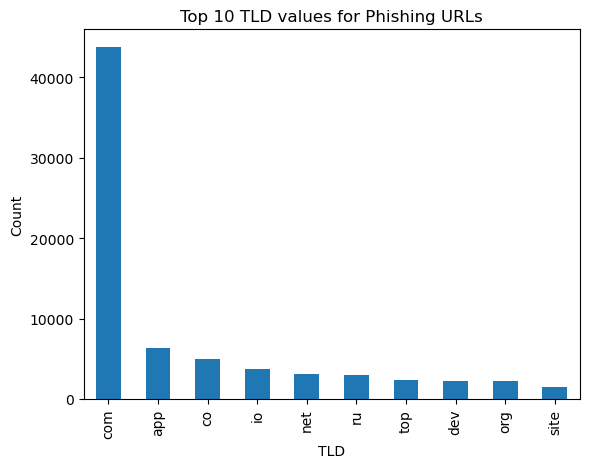

In [15]:
top_n = 10
class_distribution['Phishing'].nlargest(top_n).plot(kind='bar')

plt.title(f'Top {top_n} {col} values for Phishing URLs')
plt.ylabel('Count')
plt.show()

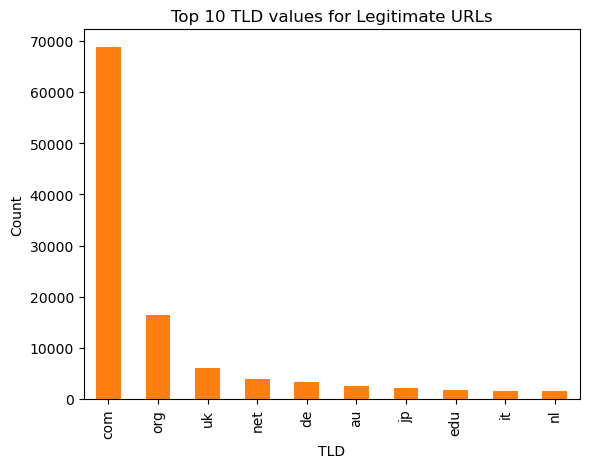

In [16]:
# get the second default color to be consistent with the following plot
second_default_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]

top_n = 10
class_distribution['Legitimate'].nlargest(top_n).plot(kind='bar', color=second_default_color)

plt.title(f'Top {top_n} {col} values for Legitimate URLs')
plt.ylabel('Count')
plt.show()

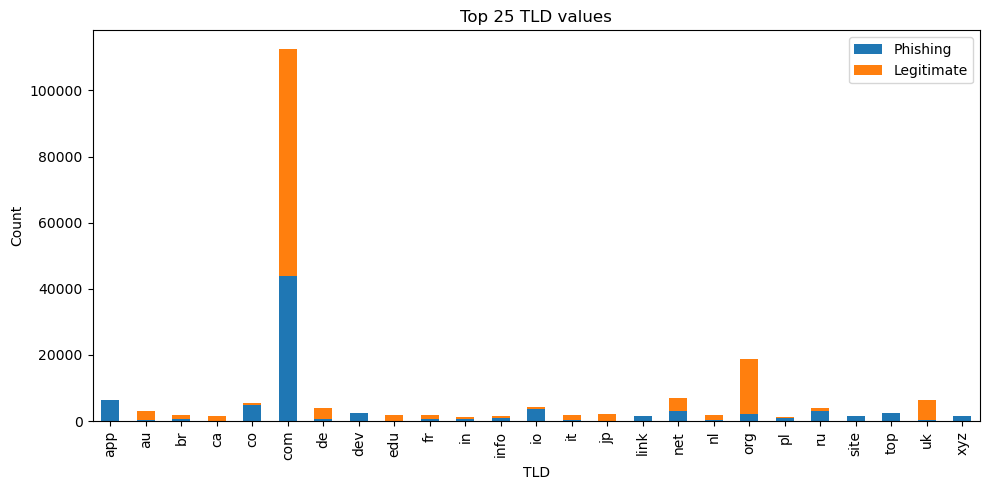

In [17]:
# as there are too many unique values, so we will plot the top N most used values
top_n = 25
top_values = dataset[col].value_counts().nlargest(top_n).index
top_n_dataset = dataset[dataset[col].isin(top_values)]

fig, ax = plt.subplots(figsize=(10, 5))

top_n_dataset.groupby([col, 'label']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel(col)
ax.set_ylabel('Count')
ax.legend(['Phishing', 'Legitimate'])

plt.title(f'Top {top_n} {col} values')
plt.tight_layout()
plt.show()

### Visualize binary features

In [18]:
# extract binary columns (features with values 0 and 1 — note that also includes the target column)
binary_cols = [col for col in dataset.columns if set(dataset[col].unique()).issubset({0, 1})]

print(binary_cols)

['IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'label']


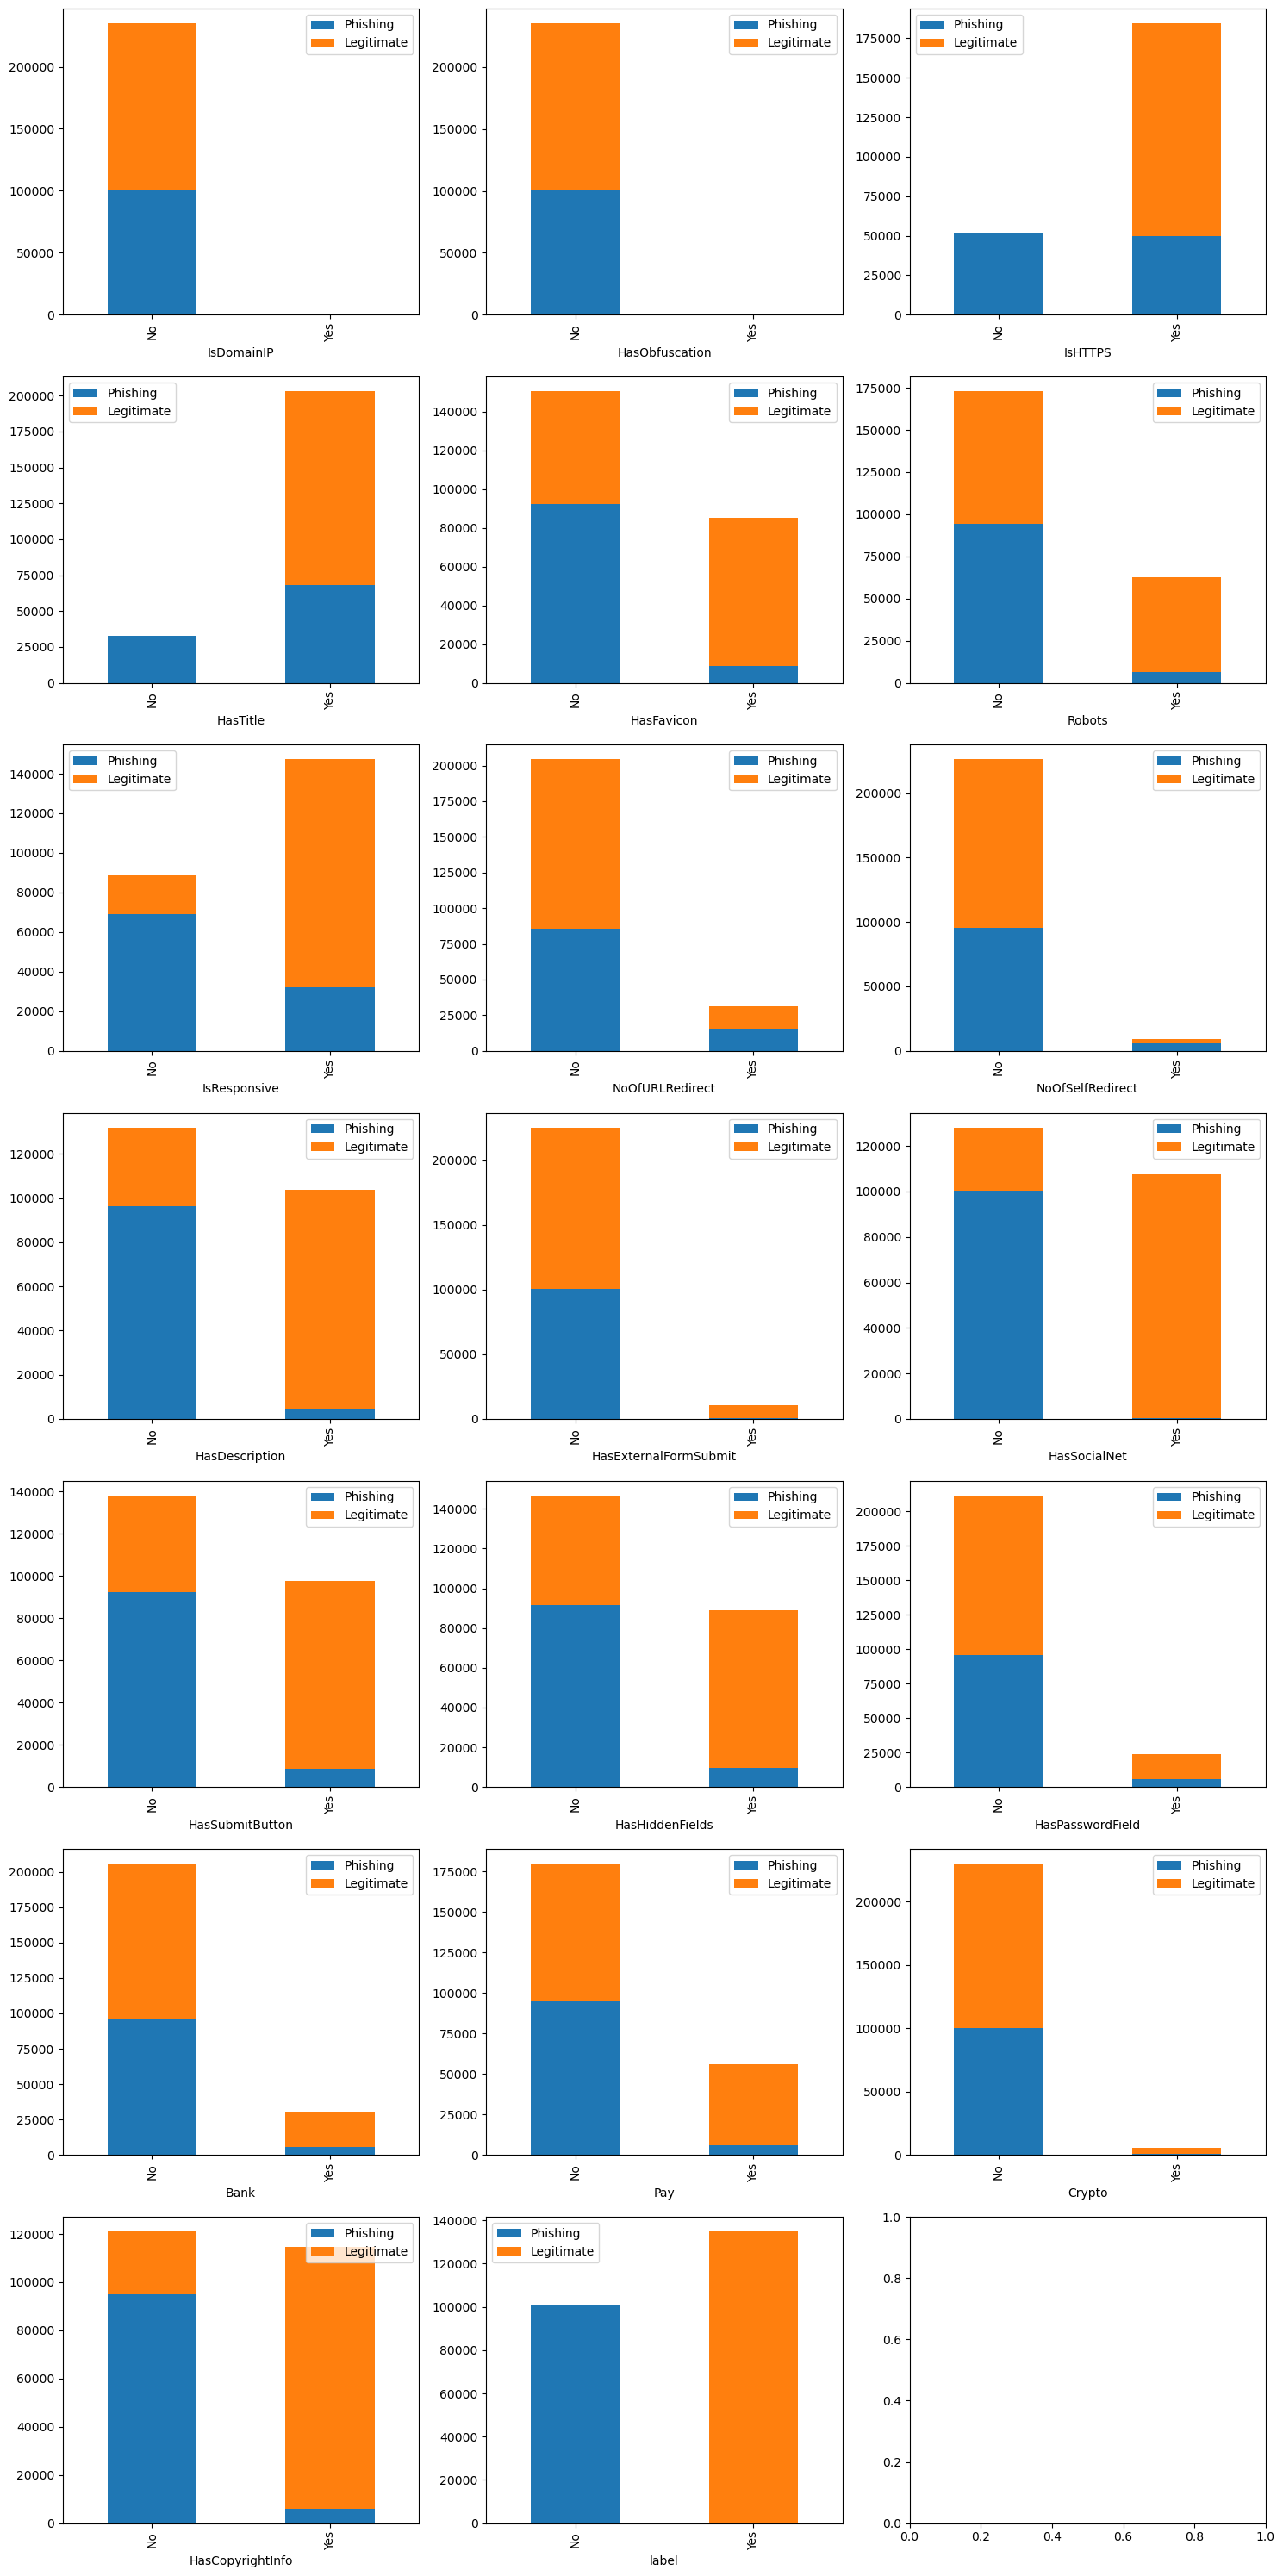

In [19]:
ncols = 3
nrows = math.ceil(len(binary_cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 30))

for i, bin_col in enumerate(binary_cols):
    # get current subplot axis (axes[row, col])
    ax = axes[i // ncols, i % ncols]
    dataset.groupby([bin_col, 'label']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel(bin_col)
    # ax.set_ylabel('Count') # avoid cluttering the plot
    ax.set_xticklabels(['No', 'Yes']) # easier to read than 0 and 1
    ax.legend(['Phishing', 'Legitimate'])

plt.tight_layout()
plt.show()

### Visualize numerical features

In [20]:
# extract numerical columns
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
# remove binary columns as they were already analyzed
numerical_cols = [col for col in numerical_cols if col not in binary_cols]

print(numerical_cols)

['URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']


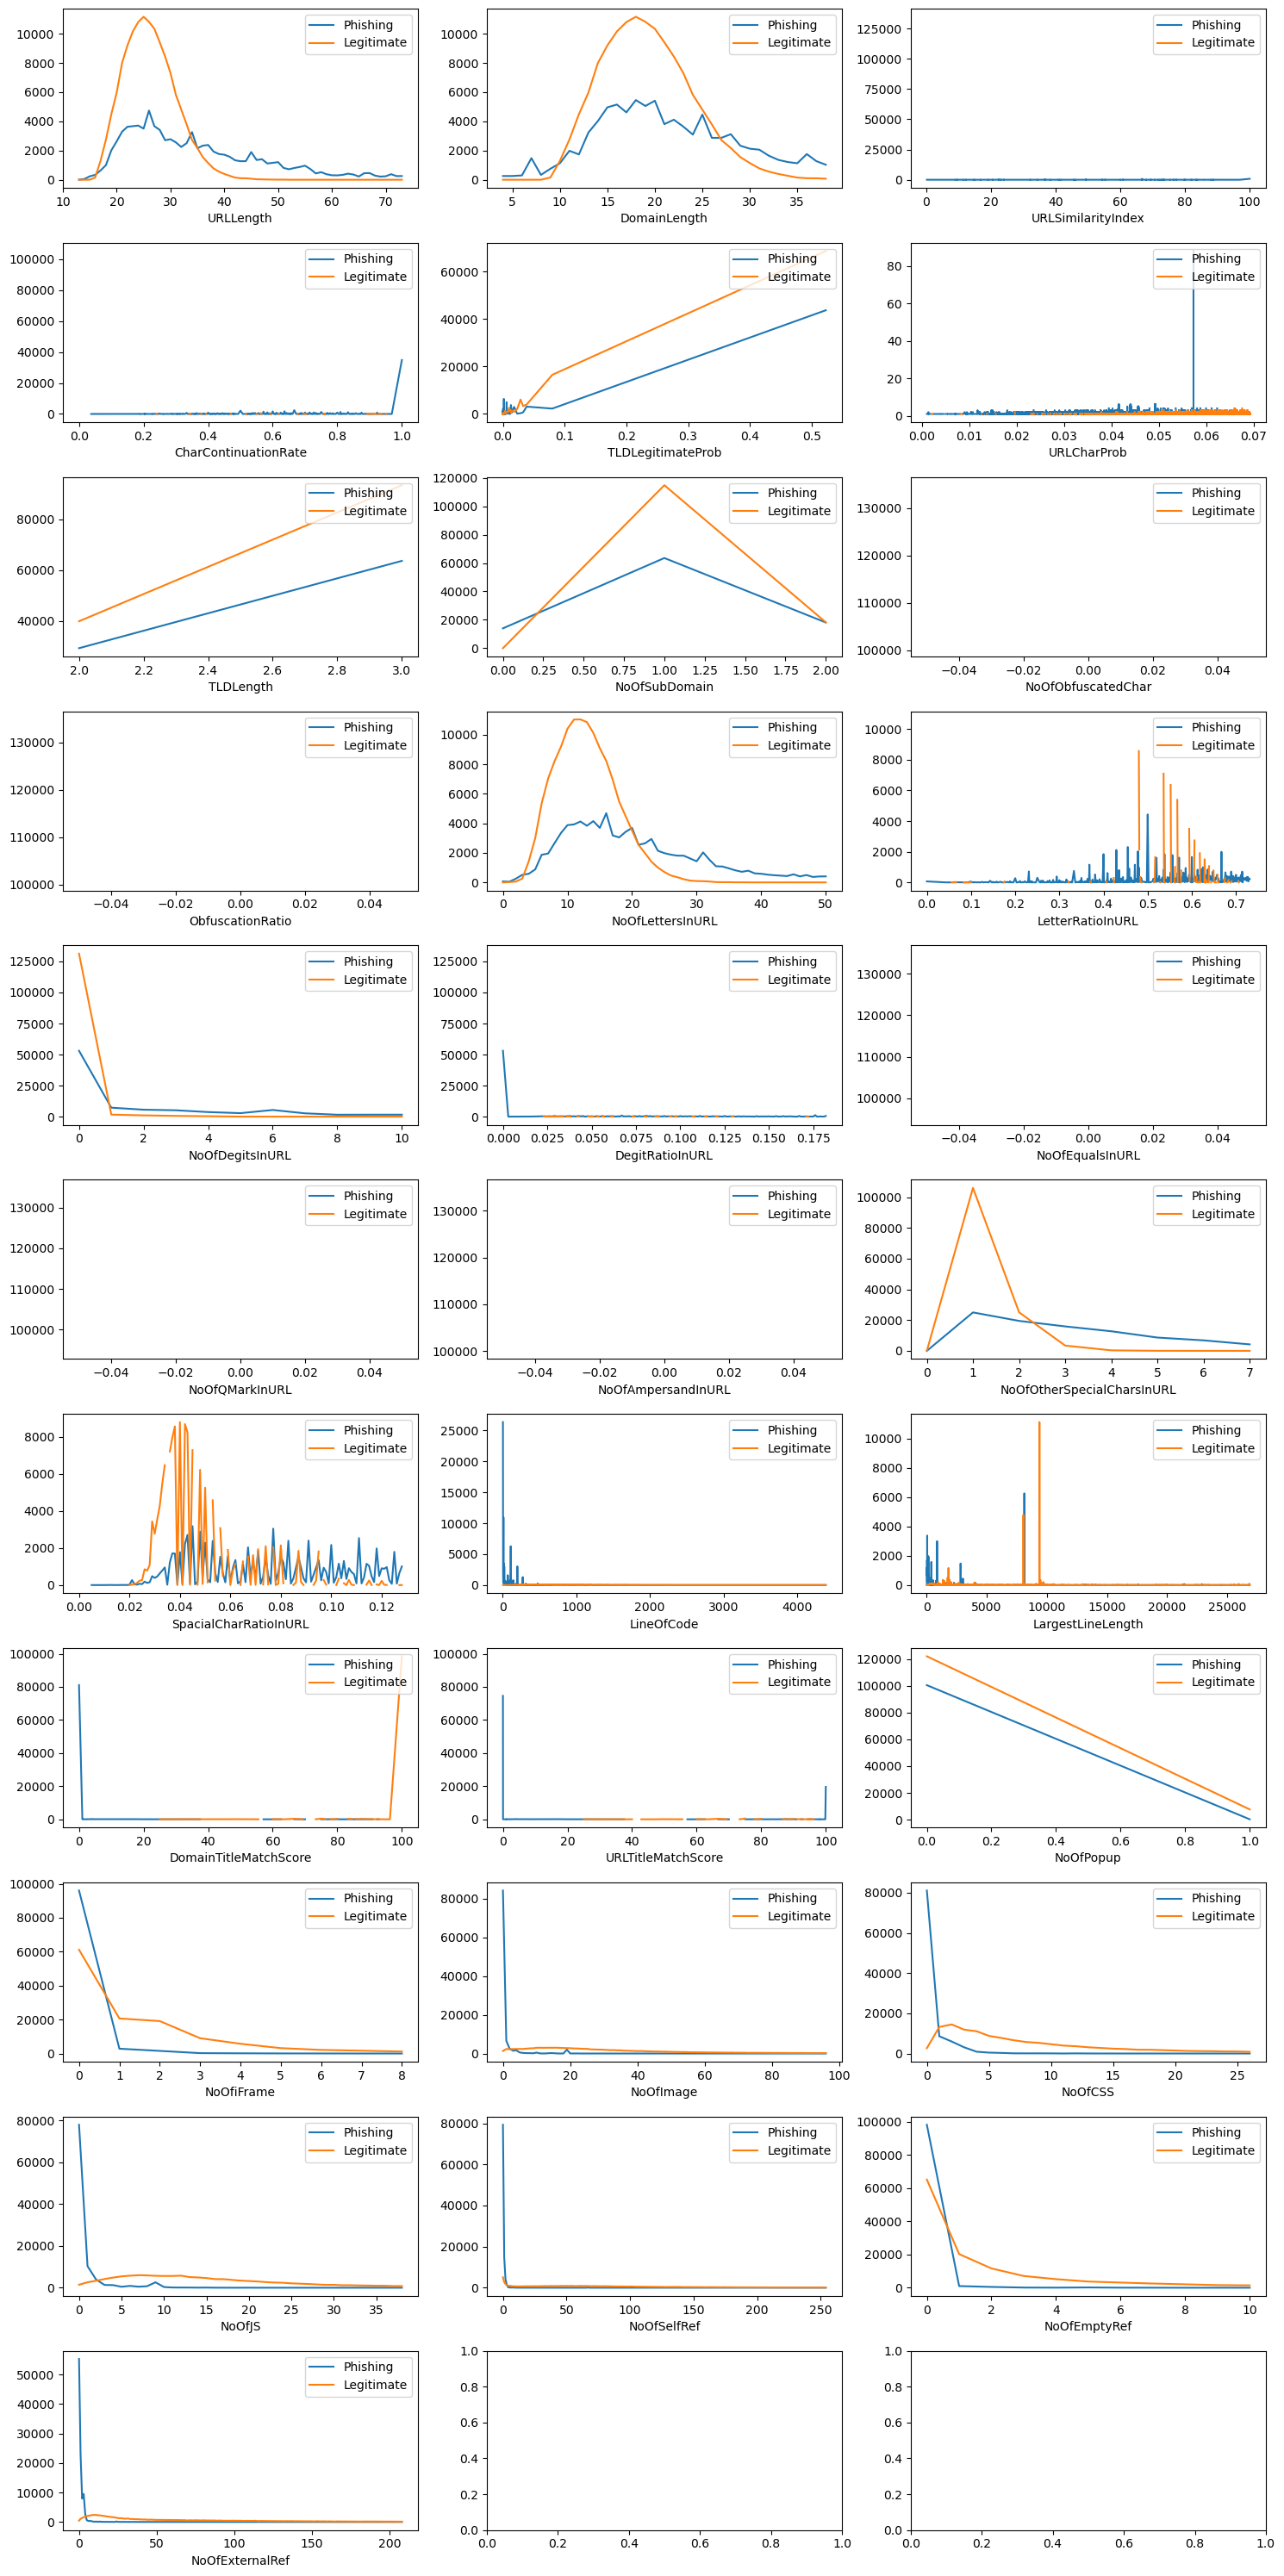

In [21]:
# extract discrete numerical columns, they will be treated differently
discrete_cols = dataset.select_dtypes(include=['int64']).columns.tolist()

ncols = 3
nrows = math.ceil(len(numerical_cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 30))

for i, num_col in enumerate(numerical_cols):
    ax = axes[i // ncols, i % ncols]
    # limit the data to the 95th percentile to avoid plotting whole dataset
    upper_bound = dataset[num_col].quantile(0.95)
    filtered_data = dataset[dataset[num_col] <= upper_bound]

    if num_col in discrete_cols:
        filtered_data[[num_col, 'label']].groupby([num_col, 'label']).size().unstack().fillna(0).plot(ax=ax)
    else:
        filtered_data.groupby([num_col, 'label']).size().unstack().plot(ax=ax)
    
    ax.set_xlabel(num_col)
    # ax.set_ylabel('Count') # avoid cluttering the plot
    ax.autoscale(enable=True, axis='y') # Auto-scale the y-axis
    ax.legend(['Phishing', 'Legitimate'], loc='upper right') # loc='best' can be slow when there are many subplots

plt.tight_layout()
plt.show()